In [3]:
!pip uninstall torchvision -y

Found existing installation: torchvision 0.14.1a0+5e8e2f1
Uninstalling torchvision-0.14.1a0+5e8e2f1:
  Successfully uninstalled torchvision-0.14.1a0+5e8e2f1


In [4]:
!pip install torchvision

     |████████████████████████████████| 14.0 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 84.1 MB 30 kB/s s eta 0:00:01     |██████████▏                     | 26.6 MB 25.5 MB/s eta 0:00:03     |██████████████████████▊         | 59.8 MB 21.5 MB/s eta 0:00:02
     |████████████████████████████████| 168 kB 34.5 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0a0+ec3941ad.nv23.2
    Uninstalling torch-2.0.0a0+ec3941ad.nv23.2:
      Successfully uninstalled torch-2.0.0a0+ec3941ad.nv23.2


In [15]:
!pip uninstall numpy -y

Found existing installation: numpy 1.21.1
Uninstalling numpy-1.21.1:
  Successfully uninstalled numpy-1.21.1


In [16]:
!pip install numpy==1.24.1

     |████████████████████████████████| 14.0 MB 137 kB/s eta 0:00:01
ERROR: numba 0.56.4 has requirement numpy<1.24,>=1.18, but you'll have numpy 1.24.1 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.4
    Not uninstalling numpy at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'numpy'. No files were found to uninstall.


In [1]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

In [77]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.5)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [64]:
weights

FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1

In [65]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

In [89]:
!wget http://172.26.22.159:8000/output3.jpg

--2024-01-05 05:26:47--  http://172.26.22.159:8000/output3.jpg
Connecting to 172.26.22.159:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13288 (13K) [image/jpeg]
Saving to: ‘output3.jpg’

output3.jpg         100%[===================>]  12.98K  --.-KB/s    in 0.003s  

2024-01-05 05:26:47 (4.06 MB/s) - ‘output3.jpg’ saved [13288/13288]



In [90]:
# Step 3: Apply inference preprocessing transforms
img = read_image("./output3.jpg")
batch = [preprocess(img)]

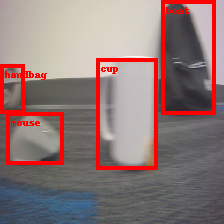

In [91]:
# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()